# Vehicle Policy Lapse Prediction

In [1]:
import pandas as pd, numpy as np , seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
def warn(*args, **kwargs): 
    pass 
import warnings 
warnings.warn = warn

# Ignore divide by zero, overflow, and invalid value warnings
np.seterr(divide='ignore', over='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
base_dir = Path.cwd().parent
data_path = base_dir / "data" / "eudirectlapse.csv"

data= pd.read_csv(data_path)
data.head()

,lapse,polholder_age,polholder_BMCevol,polholder_diffdriver,polholder_gender,polholder_job,policy_age,policy_caruse,policy_nbcontract,prem_final,prem_freqperyear,prem_last,prem_market,prem_pure,vehicl_age,vehicl_agepurchase,vehicl_garage,vehicl_powerkw,vehicl_region
0,0,38,stable,only partner,Male,normal,1,private or freelance work,1,232.46,4 per year,232.47,221.56,243.59,9,8,private garage,225 kW,Reg7
1,1,35,stable,same,Male,normal,1,private or freelance work,1,208.53,4 per year,208.54,247.56,208.54,15,7,private garage,100 kW,Reg4
2,1,29,stable,same,Male,normal,0,private or freelance work,1,277.34,1 per year,277.35,293.32,277.35,14,6,underground garage,100 kW,Reg7
3,0,33,down,same,Female,medical,2,private or freelance work,1,239.51,4 per year,244.40,310.91,219.95,17,10,street,75 kW,Reg5
4,0,50,stable,same,Male,normal,8,unknown,1,554.54,4 per year,554.55,365.46,519.50,16,8,street,75 kW,Reg14


In [4]:
data.dtypes.value_counts()

object     9
int64      6
float64    4
Name: count, dtype: int64

In [5]:
data.shape

(23060, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23060 entries, 0 to 23059
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lapse                 23060 non-null  int64  
 1   polholder_age         23060 non-null  int64  
 2   polholder_BMCevol     23060 non-null  object 
 3   polholder_diffdriver  23060 non-null  object 
 4   polholder_gender      23060 non-null  object 
 5   polholder_job         23060 non-null  object 
 6   policy_age            23060 non-null  int64  
 7   policy_caruse         23060 non-null  object 
 8   policy_nbcontract     23060 non-null  int64  
 9   prem_final            23060 non-null  float64
 10  prem_freqperyear      23060 non-null  object 
 11  prem_last             23060 non-null  float64
 12  prem_market           23060 non-null  float64
 13  prem_pure             23060 non-null  float64
 14  vehicl_age            23060 non-null  int64  
 15  vehicl_agepurchase 

In [7]:
data.describe()

,lapse,polholder_age,policy_age,policy_nbcontract,prem_final,prem_last,prem_market,prem_pure,vehicl_age,vehicl_agepurchase
count,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000,23060.000000
mean,0.128101,43.045490,2.443452,1.305637,374.123791,380.508774,373.528631,355.882315,13.060624,7.680876
std,0.334209,12.352291,3.100771,0.788647,212.899174,227.937859,201.915809,197.138010,3.590088,4.960701
min,0.000000,19.000000,0.000000,1.000000,46.550000,46.560000,50.110000,45.550000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,1.000000,232.837500,232.630000,245.150000,227.100000,11.000000,4.000000
50%,0.000000,41.000000,1.000000,1.000000,312.250000,311.005000,316.830000,301.445000,13.000000,8.000000
75%,0.000000,49.000000,4.000000,1.000000,448.370000,449.602500,434.452500,423.562500,16.000000,11.000000
max,1.000000,85.000000,17.000000,15.000000,2948.050000,3362.070000,2416.840000,2716.080000,18.000000,18.000000


In [8]:
data.iloc[:,1:].head()

,polholder_age,polholder_BMCevol,polholder_diffdriver,polholder_gender,polholder_job,policy_age,policy_caruse,policy_nbcontract,prem_final,prem_freqperyear,prem_last,prem_market,prem_pure,vehicl_age,vehicl_agepurchase,vehicl_garage,vehicl_powerkw,vehicl_region
0,38,stable,only partner,Male,normal,1,private or freelance work,1,232.46,4 per year,232.47,221.56,243.59,9,8,private garage,225 kW,Reg7
1,35,stable,same,Male,normal,1,private or freelance work,1,208.53,4 per year,208.54,247.56,208.54,15,7,private garage,100 kW,Reg4
2,29,stable,same,Male,normal,0,private or freelance work,1,277.34,1 per year,277.35,293.32,277.35,14,6,underground garage,100 kW,Reg7
3,33,down,same,Female,medical,2,private or freelance work,1,239.51,4 per year,244.40,310.91,219.95,17,10,street,75 kW,Reg5
4,50,stable,same,Male,normal,8,unknown,1,554.54,4 per year,554.55,365.46,519.50,16,8,street,75 kW,Reg14


In [9]:
duplicate_rows = data.duplicated().sum()
print(f"Duplicated rows: {duplicate_rows}")

missing_values = data.isnull().sum().sum()
print(f"Missing values: {missing_values}")

Duplicated rows: 0
Missing values: 0


## Exploratory Data Analysis
**Target Variable:** `lapse` 

lapse
0    87.189939
1    12.810061
Name: proportion, dtype: float64


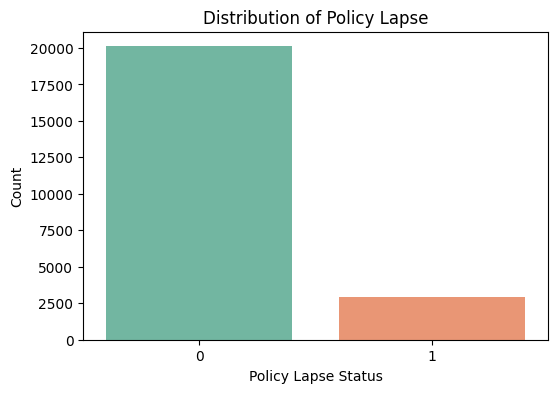

In [10]:
lapse_percent = data['lapse'].value_counts(normalize=True)*100
print(lapse_percent)

plt.figure(figsize=(6, 4))
sns.countplot(x='lapse', data=data, palette='Set2')
plt.title('Distribution of Policy Lapse')
plt.xlabel('Policy Lapse Status')
plt.ylabel('Count')
plt.show()

#### Target Variable Analysis

* 20,106 policies did not lapse (0): **87.2%**
* 2,954 policies lapsed (1): **12.8%**

The target is highly imbalanced, which is common in insurance lapse/churn data.
* Models may favor the majority class if no adjustments are made.
* Handling options include class weighting, oversampling the minority class, or using stratified train test splits.

In [11]:
def hist_and_box_plot(feature):
    plt.figure(figsize=(15,5))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data[feature], bins=20, kde=True, color='skyblue')
    plt.axvline(data[feature].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(data[feature].median(), color='green', linestyle='--', label='Median')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.legend()

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature], color='lightgreen')
    plt.title(f'Boxplot of  {feature}')
    plt.xlabel('Age')

    plt.tight_layout()
    plt.show()

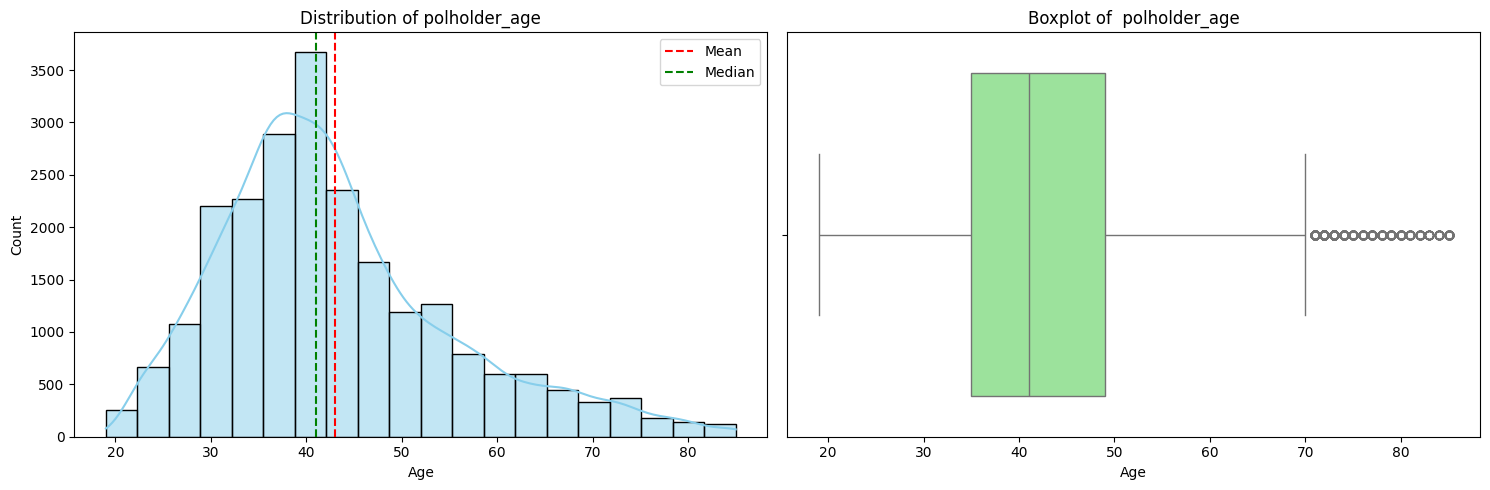

Skewness: 0.8917349177158745


In [12]:
hist_and_box_plot(feature="polholder_age" )
skew_value = data['polholder_age'].skew()
print("Skewness:", skew_value)

#### Policyholder Age Analysis


- Policyholder ages mostly fall between 30–55, peaking in the late 30s to early 40s.
- The distribution is slightly right‑skewed, with a longer tail toward higher ages.
- The mean age lies to the right of the median age line, which is consistent with a positively skewed distribution.
- Skewness is mild, so many standard models and tests that assume normality can still perform adequately without transforming this variable.

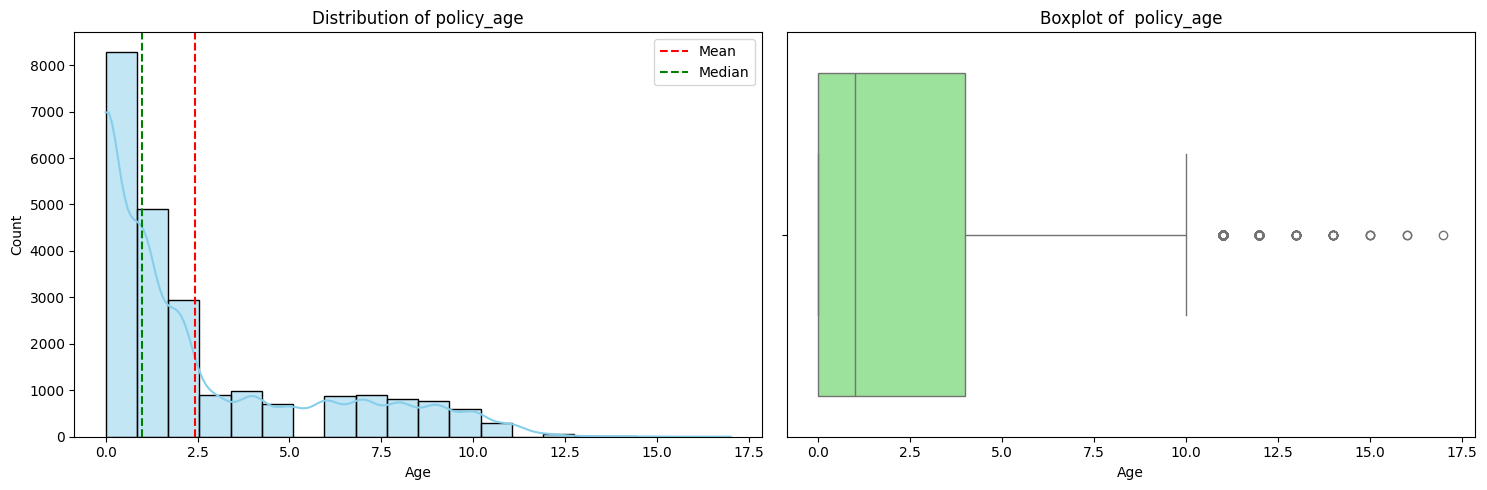

Skewness: 1.327585726638478


In [13]:
hist_and_box_plot(feature="policy_age" )
skew_value = data['policy_age'].skew()
print("Skewness:", skew_value)

### Policy Age Analysis
- Most policies are very new, with a median age of about 1 year.
- The distribution is strongly right skewed, with few long tenure policies.
- A log or square root transformation may improve modeling performance.

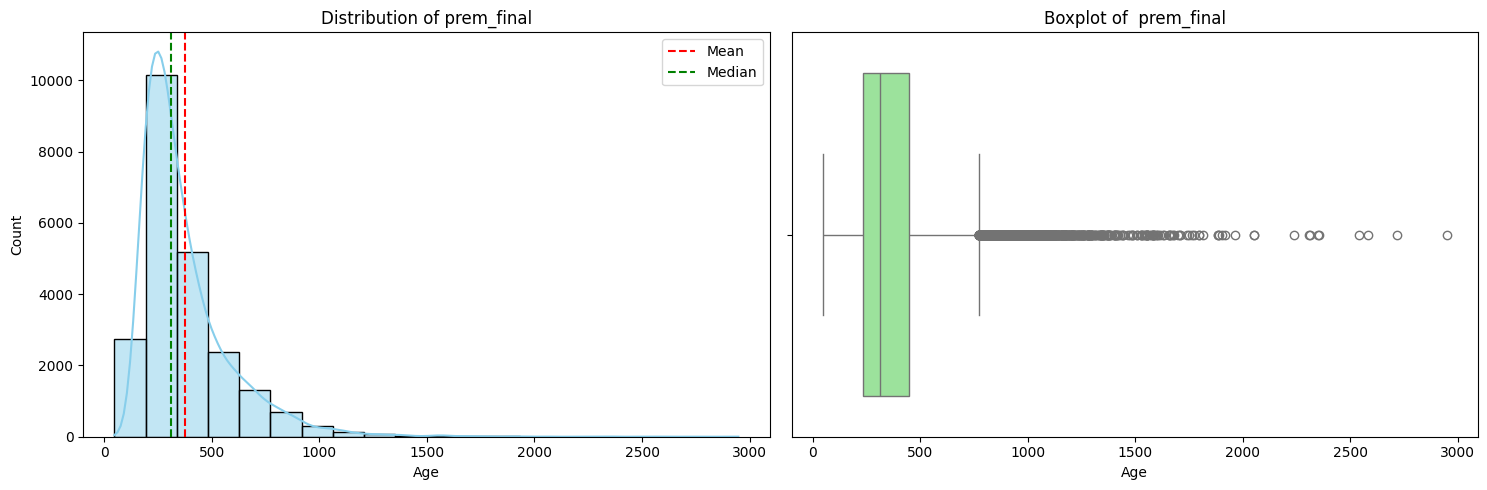

Skewness: 2.2405369605223875


In [14]:
hist_and_box_plot(feature="prem_final" )
skew_value = data['prem_final'].skew()
print("Skewness:", skew_value)

#### Premium Final Analysis 

- Most premiums cluster between about 200 and 450, with a median around 300.
- The distribution is strongly right skewed, with a small number of high premiums reaching close to 3000.
- The mean exceeds the median due to these high values.
- A log transformation can help reduce skewness and improve modeling.

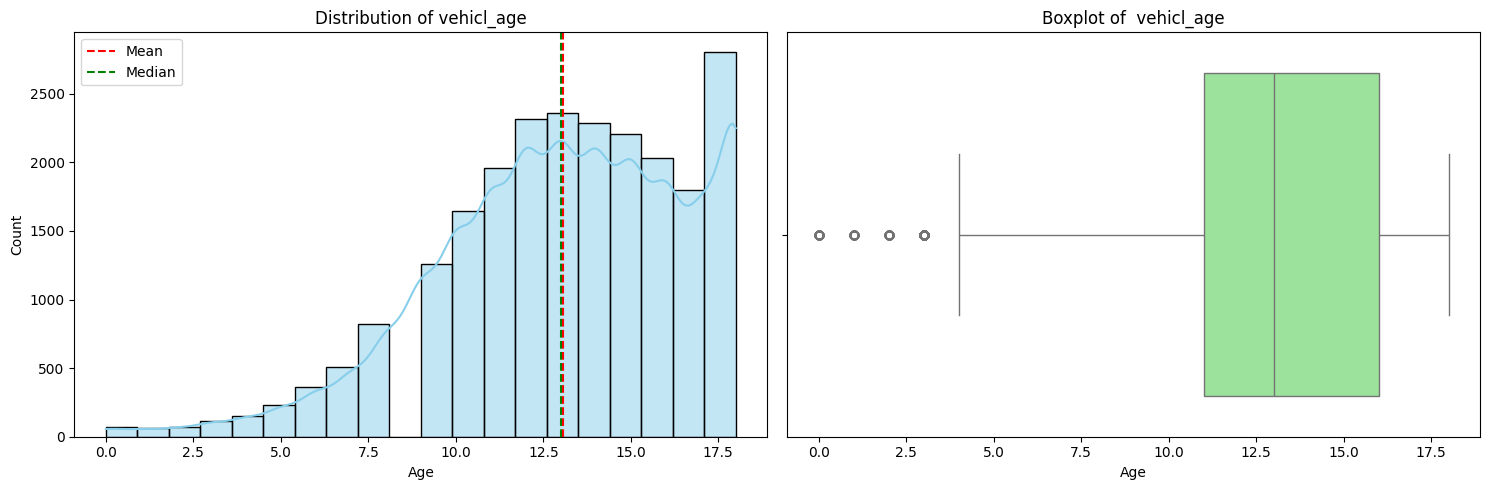

Skewness: -0.6413132208598351


In [15]:
hist_and_box_plot(feature="vehicl_age" )
skew_value = data['vehicl_age'].skew()
print("Skewness:", skew_value)

#### Vehicle Age Analysis 
- Vehicle ages range from 0 to about 18 years, with most vehicles between roughly 12 and 18 years.
- The average and median vehicle age are around 13 years, indicating an ageing portfolio.
- The distribution is mildly left skewed, with relatively few newer vehicles.
- Vehicle age can be used directly or grouped into bins for modeling purposes.


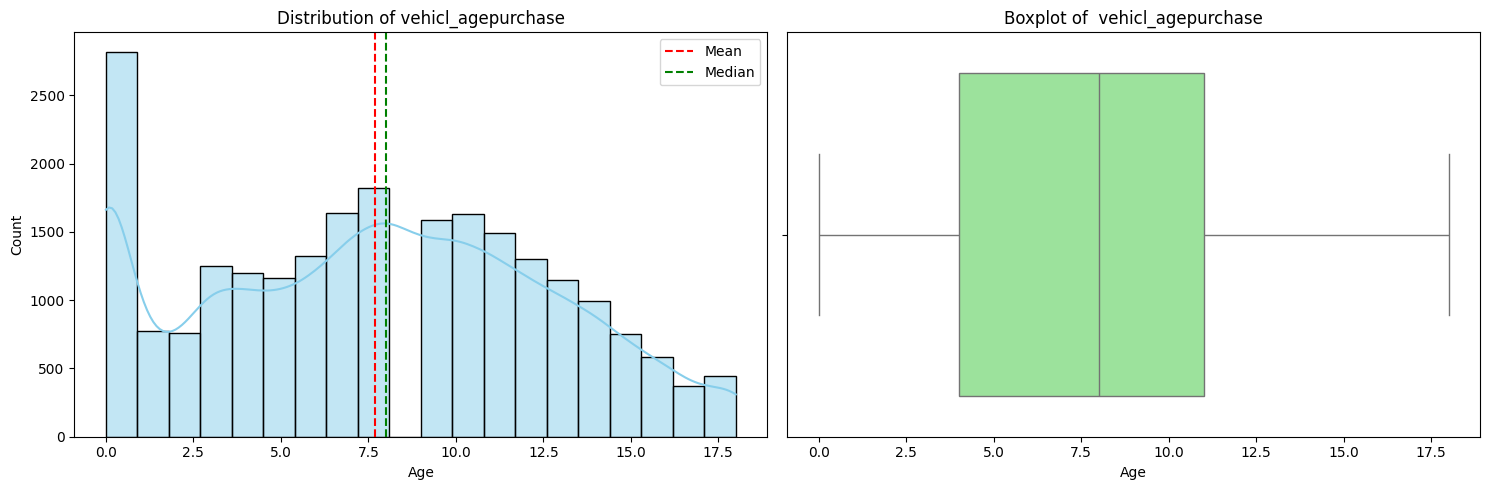

Skewness: 0.059698707805640884


In [16]:
hist_and_box_plot(feature="vehicl_agepurchase" )
skew_value = data['vehicl_agepurchase'].skew()
print("Skewness:", skew_value)

#### Vehicle Age at Purchase Analysis (from histogram)

- Vehicle age at purchase ranges from 0 to about 18 years, with a clear spike at new vehicles and many purchases between about 4 and 12 years.
- The mean and median are around 7 8 years, showing most vehicles are purchased at mid age rather than new.
- The distribution reflects a mix of new and used vehicle purchases and is only mildly skewed.

In [17]:
premium_cols = ['prem_final', 'prem_last', 'prem_market', 'prem_pure']
corr_matrix = data[premium_cols].corr()
print(corr_matrix)

             prem_final  prem_last  prem_market  prem_pure
prem_final     1.000000   0.950642     0.894923   0.990542
prem_last      0.950642   1.000000     0.838543   0.925565
prem_market    0.894923   0.838543     1.000000   0.899280
prem_pure      0.990542   0.925565     0.899280   1.000000


### Premium Features Analysis

- Most premium features are right-skewed with valid high values, so no removal is needed.
- The premium variables are highly correlated; keeping only prem_final is sufficient.
- Higher premiums may be associated with increased policy lapse risk.

#### **Numerical Feature Analysis**
| Feature                    | Key Observation / Insight                                                                                                     | Decision |
| -------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | -------- |
| **polholder_age**          | Younger policyholders (18–29) have highest lapse (~17%), older policyholders more stable                                      | Keep     |
| **policy_age**             | Most policies are 0–4 years old; lapse slightly higher for new policies                                                       | Keep     |
| **vehicle_age_difference** | Difference between current vehicle age and purchase age reflects vehicle depreciation; higher differences may influence lapse | Keep     |
| **prem_final**             | Reflects final premium paid; outliers exist but are plausible; higher premiums slightly correlate with lower lapse            | Keep     |
| **prem_last**              | Highly correlated with prem_final (0.95); redundant                                                                           | Drop     |
| **prem_market**            | Highly correlated with prem_final (0.89); redundant                                                                           | Drop     |
| **prem_pure**              | Highly correlated with prem_final (0.99); redundant                                                                           | Drop     |

## Catrgorical fetaures 

In [18]:
def cross_table(feature):
    return data.groupby(feature)['lapse'].value_counts(normalize=True).mul(100).round(2)

cat_columns = ['polholder_BMCevol', 'polholder_diffdriver', 'polholder_gender', 
               'polholder_job', 'policy_caruse', 'vehicl_garage', 'vehicl_region']


for col in cat_columns:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].value_counts())
    print("-"*40)


polholder_BMCevol: 3 unique values
polholder_BMCevol
stable    12036
down      10155
up          869
Name: count, dtype: int64
----------------------------------------
polholder_diffdriver: 7 unique values
polholder_diffdriver
same                11155
only partner         8128
young drivers        1955
all drivers > 24     1728
learner 17             42
commercial             40
unknown                12
Name: count, dtype: int64
----------------------------------------
polholder_gender: 2 unique values
polholder_gender
Male      14721
Female     8339
Name: count, dtype: int64
----------------------------------------
polholder_job: 2 unique values
polholder_job
normal     13578
medical     9482
Name: count, dtype: int64
----------------------------------------
policy_caruse: 3 unique values
policy_caruse
private or freelance work    19567
unknown                       3483
commercial                      10
Name: count, dtype: int64
----------------------------------------
vehicl_gara

### **Categorical Feature Analysis**

The analysis of categorical features shows clear differences in policy lapse behavior:

| Feature                  | Key Observation                                           | Lapse Rate (%) Range |
| ------------------------ | --------------------------------------------------------- | -------------------- |
| **polholder_diffdriver** | *learner 17/young drivers* highest lapse, commercial lowest    | 5 – 19               |
| **polholder_gender**     | *Males* slightly higher than *females*                        | 12 – 13.3            |
| **polholder_job**        | *Medical* professionals lower lapse than *normal* occupations | 12.1 – 13.3          |
| **policy_caruse**        | *Commercial* vehicles highest, *unknown* lowest               | 8.4 – 20             |
| **vehicl_garage**        | *Underground* garage highest, *private estate* lowest         | 8 – 16.6             |
| **vehicl_region**        | Regional differences: *Reg12* highest, *Reg2* lowest          | 7.4 – 18             |

**Conclusion:** All categorical features show meaningful variation in lapse rates and are retained for modeling. 

### **Ordinal Feature Analysis**

In [19]:
data['policy_nbcontract'].value_counts()

policy_nbcontract
1     18259
2      3541
3       793
4       270
5        87
6        39
7        31
10       11
8         9
9         6
15        6
11        4
13        2
12        1
14        1
Name: count, dtype: int64

In [20]:
data['prem_freqperyear'].value_counts()

prem_freqperyear
1 per year     11680
4 per year      6114
2 per year      3090
12 per year     2176
Name: count, dtype: int64

In [21]:
data['vehicl_powerkw'].value_counts()

vehicl_powerkw
75 kW         10339
100 kW         5116
25-50 kW       4968
125-300 kW     1720
150 kW          580
175 kW          206
225 kW           77
200 kW           32
250 kW           16
275 kW            4
300 kW            2
Name: count, dtype: int64

In [22]:
data['polholder_BMCevol'].value_counts() 

polholder_BMCevol
stable    12036
down      10155
up          869
Name: count, dtype: int64

Ordinal features were analyzed based on their natural ordering, distribution, and relationship with the target variable. Rare values were reviewed to avoid sparsity while preserving business meaning.

| Feature               | Key Observation / Insight                                                                 | Decision |
| --------------------- | ------------------------------------------------------------------------------------------ | -------- |
| **polholder_BMCevol**    | *Down* has highest lapse, *stable* and *up* lower         | Keep ( 0, 1,2)              |
| **policy_nbcontract** | Highly skewed; majority of policies have 1 contract, very high values are rare             | Keep (group rare high values) |
| **prem_freqperyear**  | Clear order in payment frequency; reflects customer payment behavior                       | Keep     |
| **vehicl_powerkw**    | Ordinal with long tail; very high power values are rare                                     | Keep (group rare high values) |

**Conclusion:** All ordinal features are retained. Rare high values will be grouped where necessary, and ordinal encoding will be applied during modeling.


---